In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# define the processes and operands
processes = [
    'Refinement_Extracting', 'Refinement_Removing', 'Refinement_Recovery', 'Refinement_Distilling',
    'Separation_Capturing', 'Separation_Cooling', 'Separation_Removing',
    'Utilization_Ingest', 'Utilization_Produce'
]

operands = [
    'Natural gas from well', 'Water', 'Acidic gases', 'NGLs',
    'Pipeline quality natural gas', 'Flue gas', 'Other gases',
    'Liquid CO2', 'Microbes', 'Biofuel'
]

# define the interaction matrix
interaction_matrix = [
    [1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,0,0,0,0],
    [0,1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,1,0]
]


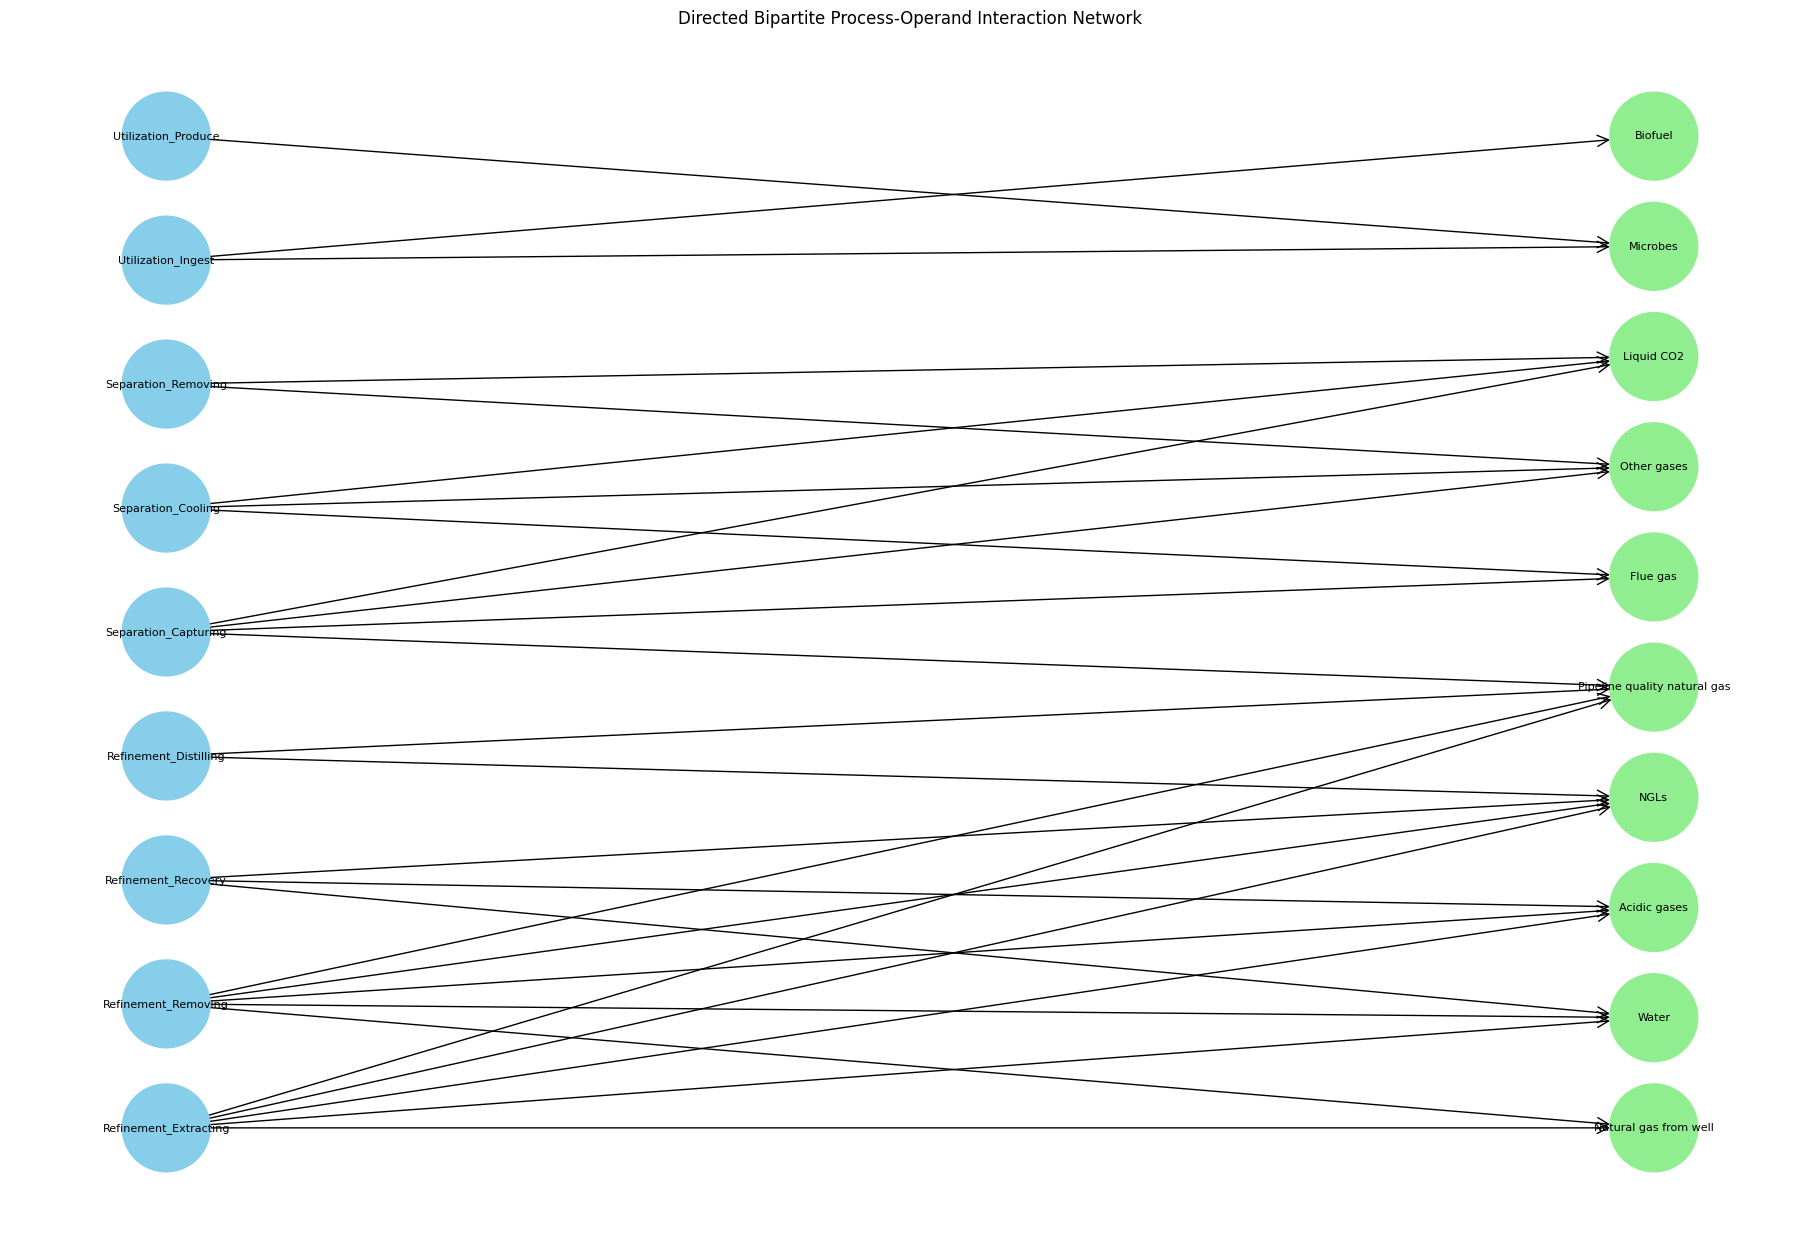

In [31]:
# create a directed bipartite graph
B = nx.DiGraph()
B.add_nodes_from(processes, bipartite=0)
B.add_nodes_from(operands, bipartite=1)

for i, process in enumerate(processes):
    for j, operand in enumerate(operands):
        if interaction_matrix[i][j]:
            B.add_edge(process, operand, weight=interaction_matrix[i][j])

plt.figure(figsize=(18,12))
pos = nx.bipartite_layout(B, nodes=processes)
nx.draw(B, pos, with_labels=True, node_size=4000, font_size=8,
        node_color=['skyblue' if n in processes else 'lightgreen' for n in B.nodes],
        arrowsize=20, arrowstyle='->')
plt.title("Directed Bipartite Process-Operand Interaction Network")
plt.show()

In [32]:
# Calculate and display the degree centrality of the nodes
degree_centrality = nx.degree_centrality(B)
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Critical Nodes by Degree Centrality:")
for node, centrality in sorted_nodes[:5]:
    print(f"- {node} (Centrality: {centrality:.2f})")


Top 5 Critical Nodes by Degree Centrality:
- Refinement_Extracting (Centrality: 0.28)
- Refinement_Removing (Centrality: 0.28)
- Separation_Capturing (Centrality: 0.22)
- NGLs (Centrality: 0.22)
- Pipeline quality natural gas (Centrality: 0.22)



Top 5 Processes by CPI:
- Refinement_Extracting: CPI = 5 (Out-Degree: 5, In-Degree: 0)
- Refinement_Removing: CPI = 5 (Out-Degree: 5, In-Degree: 0)
- Separation_Capturing: CPI = 4 (Out-Degree: 4, In-Degree: 0)
- Refinement_Recovery: CPI = 3 (Out-Degree: 3, In-Degree: 0)
- Separation_Cooling: CPI = 3 (Out-Degree: 3, In-Degree: 0)

Top 5 Operands by CPI:
- Biofuel: CPI = -1 (In-Degree: 1, Out-Degree: 0)
- Natural gas from well: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Flue gas: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Microbes: CPI = -2 (In-Degree: 2, Out-Degree: 0)
- Water: CPI = -3 (In-Degree: 3, Out-Degree: 0)

Detected Communities:
Community 1:
  Processes: ['Refinement_Extracting', 'Refinement_Recovery', 'Refinement_Distilling', 'Refinement_Removing']
  Operands: ['Acidic gases', 'Pipeline quality natural gas', 'NGLs', 'Natural gas from well', 'Water']

Community 2:
  Processes: ['Separation_Removing', 'Separation_Cooling', 'Separation_Capturing']
  Operands: ['Other gases', 'Flue 

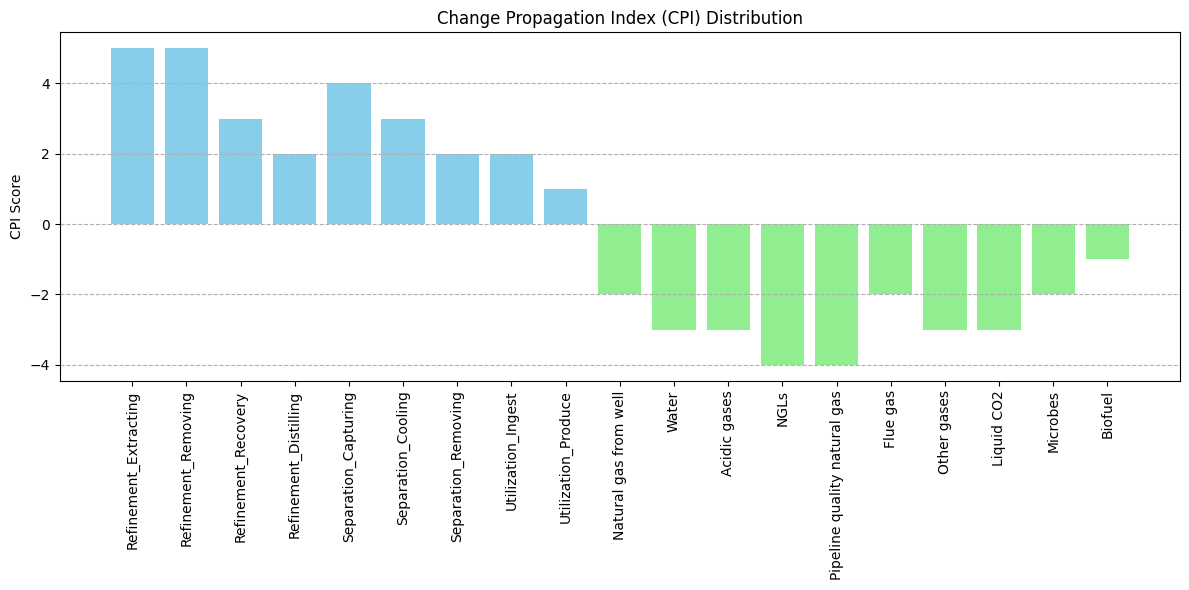

In [ ]:
# calculate the CPI (Critical Path Index) for each node
cpi = {node: B.out_degree(node) - B.in_degree(node) for node in B.nodes}

process_cpi = {k: v for k, v in cpi.items() if k in processes}
operand_cpi = {k: v for k, v in cpi.items() if k in operands}

print("\nTop 5 Processes by CPI:")
for node, score in sorted(process_cpi.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"- {node}: CPI = {score} (Out-Degree: {B.out_degree(node)}, In-Degree: {B.in_degree(node)})")

print("\nTop 5 Operands by CPI:")
for node, score in sorted(operand_cpi.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"- {node}: CPI = {score} (In-Degree: {B.in_degree(node)}, Out-Degree: {B.out_degree(node)})")
    
communities = list(community.greedy_modularity_communities(B.to_undirected()))

print("\nDetected Communities:")
for i, comm in enumerate(communities):
    print(f"Community {i+1}:")
    print(f"  Processes: {[n for n in comm if n in processes]}")
    print(f"  Operands: {[n for n in comm if n in operands]}\n")

plt.figure(figsize=(12,6))
nodes = list(cpi.keys())
values = list(cpi.values())
colors = ['skyblue' if n in processes else 'lightgreen' for n in nodes]

plt.bar(nodes, values, color=colors)
plt.xticks(rotation=90)
plt.title("Change Propagation Index (CPI) Distribution")
plt.ylabel("CPI Score")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Topological Complexity Metrics:
1. Network Density: 0.04
2. Average Clustering: 0.00
3. Assortativity: 0.29

Critical Change Propagation Nodes:
- Separation_Cooling: CPI = 5.4 (Risk: 0.2)
- Flue gas: CPI = -5.3 (Risk: 0.88)
- Liquid CO2: CPI = -2.8 (Risk: 0.92)
- Refinement_Distilling: CPI = 2.0 (Risk: 0.2)
- Utilization_Produce: CPI = 1.8 (Risk: 0.2)

Functional Clusters (OS14 Grouping):
Cluster 1 (CO2 Concentration Group):
 Processes: ['Separation_Removing', 'Separation_Cooling', 'Utilization_Ingest']
 Operands: ['Other gases', 'Liquid CO2', 'Microbes']

Cluster 2 (Geological Factors):
 Processes: ['Refinement_Distilling', 'Separation_Capturing']
 Operands: ['Flue gas', 'Pipeline quality natural gas']

Cluster 3 (Geological Factors):
 Processes: ['Refinement_Removing']
 Operands: ['Acidic gases', 'Water']

Cluster 4 (Geological Factors):
 Processes: ['Refinement_Extracting']
 Operands: ['Natural gas from well']

Cluster 5 (Geological Factors):
 Processes: ['Refinement_Recovery']
 Ope

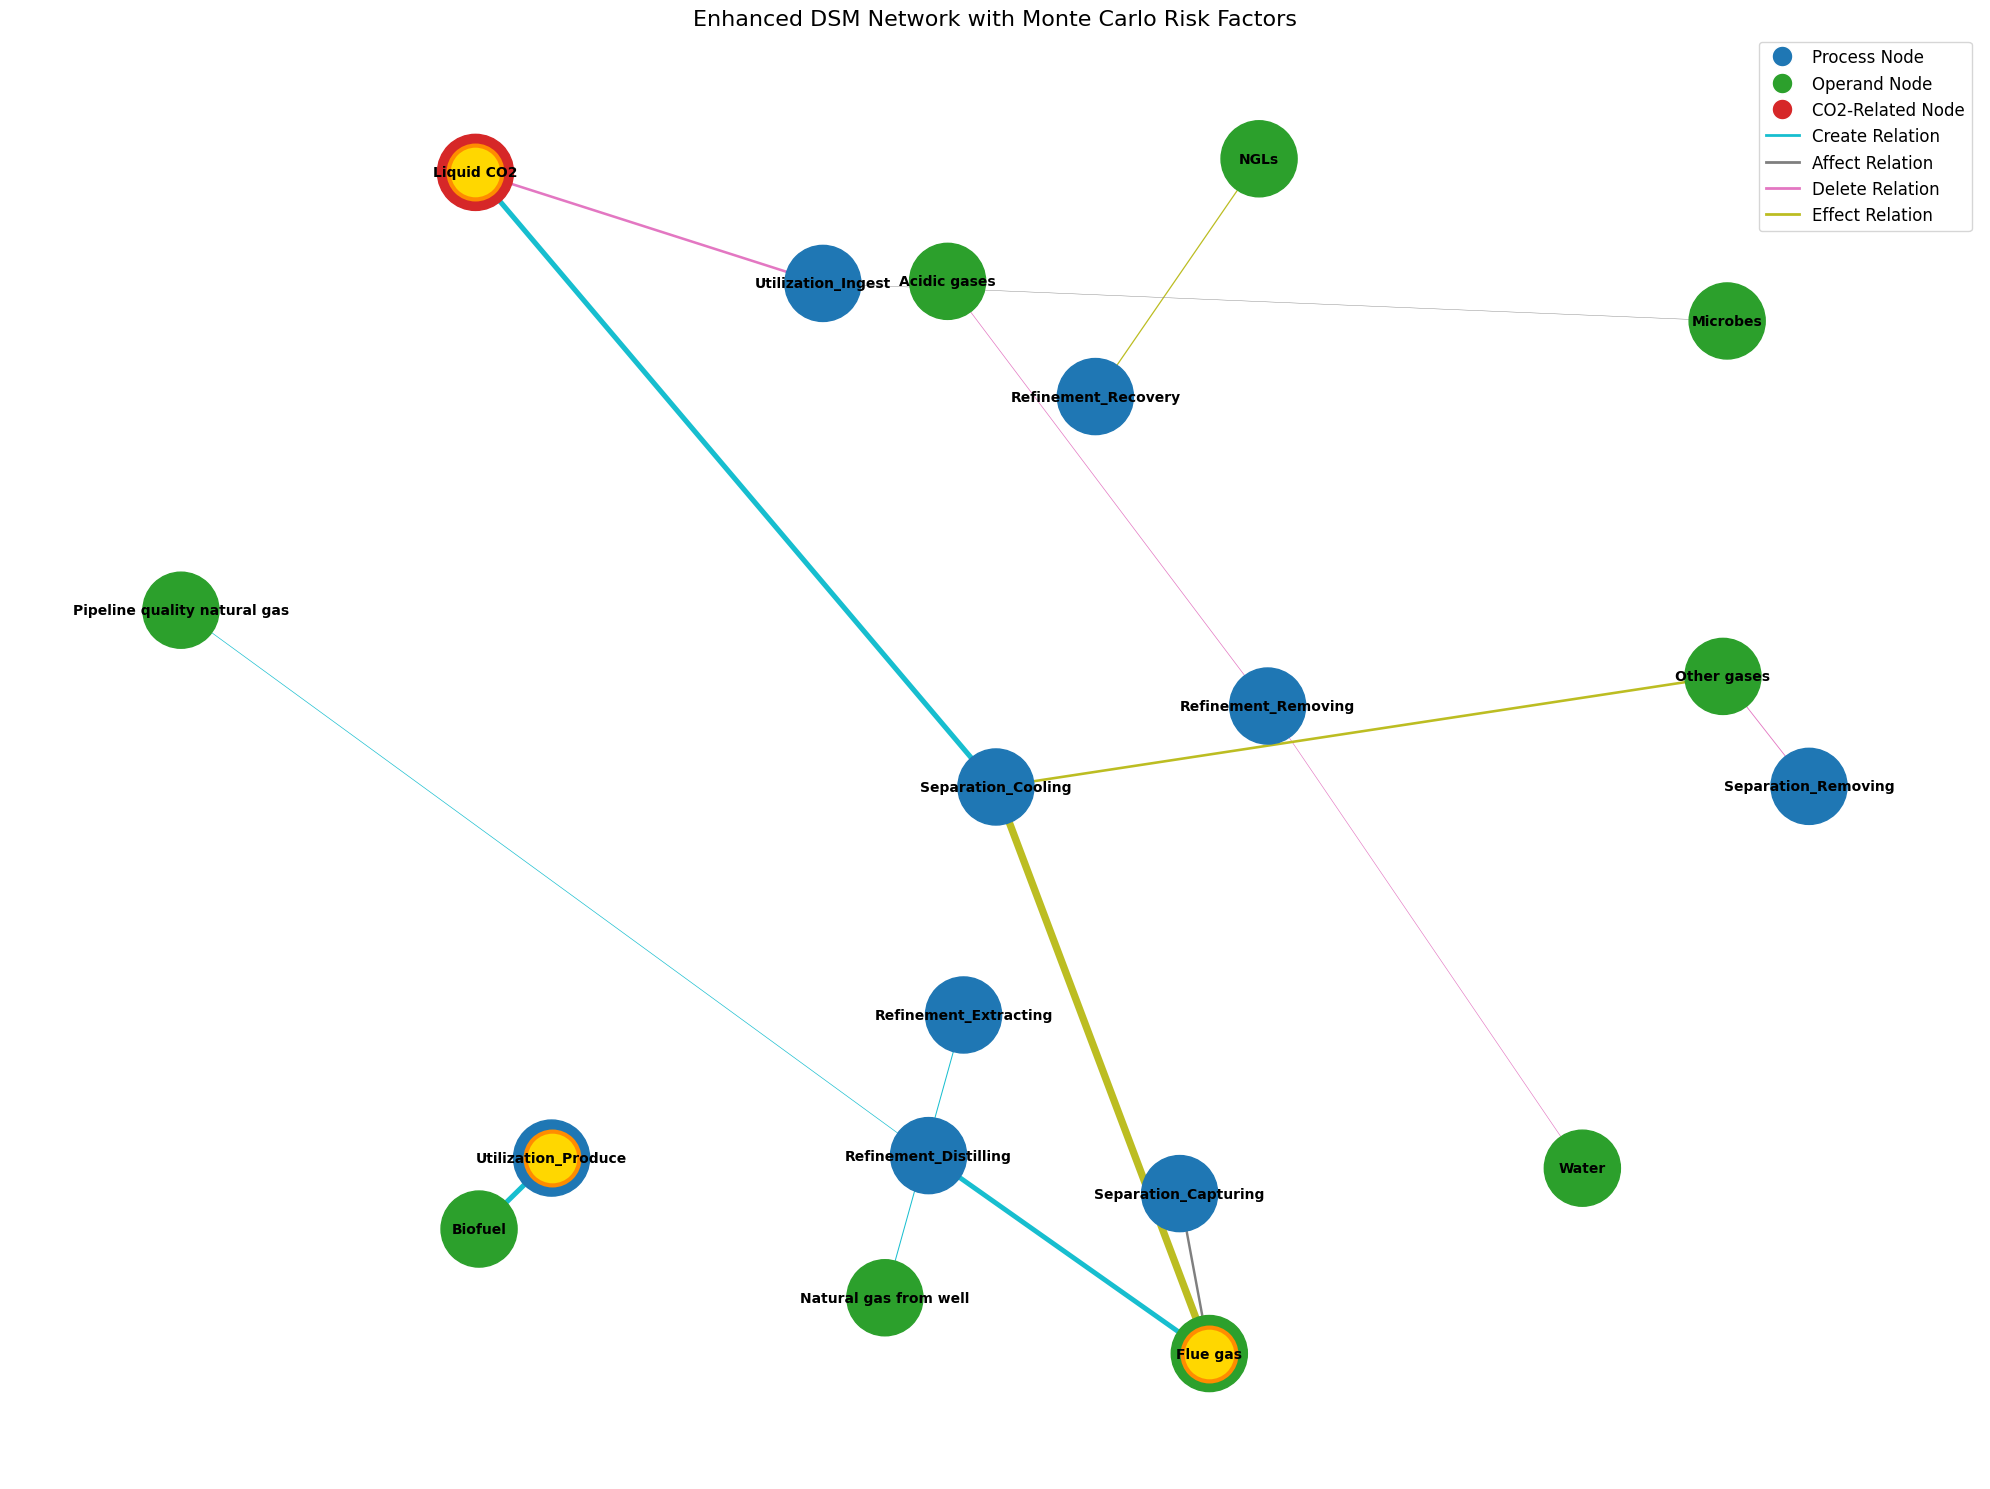

In [41]:
# DSM Symbol Mapping based on OS14 Architectural Decisions (AD2)
SYMBOL_MAPPING = {
    'a': ('affect', 1),    # Input modification (AD2 Beta distribution)
    'c': ('create', 2),    # Operand generation (Cryogenic separation - AD2-D)
    'd': ('delete', -1),   # Operand removal (PID-controlled process)
    'e': ('effect', 3)     # Phase change (CO2 liquefaction - AD4)
}

# Process-Operand Interaction Matrix (Source: OS14 Appendix AD Table)
# Columns represent operands in order:
# [Natural_gas, Water, Acidic_gases, NGLs, Pipeline_gas, Flue_gas, Other_gases, Liquid_CO2, Microbes, Biofuel]
PROCESS_OPERAND_MATRIX = [
    ['c', '',  '',  '',  '',  '',  '',  '',  '',  ''],   # Refinement_Extracting
    ['', 'd', 'd', '',  '',  '',  '',  '',  '',  ''],    # Refinement_Removing
    ['', '',  '',  'e', '',  '',  '',  '',  '',  ''],    # Refinement_Recovery
    ['', '',  '',  '',  'c', 'c', '',  '',  '',  ''],    # Refinement_Distilling
    ['', '',  '',  '',  '',  'a', '',  '',  '',  ''],    # Separation_Capturing
    ['', '',  '',  '',  '',  'e', 'e', 'c', '',  ''],    # Separation_Cooling
    ['', '',  '',  '',  '',  '',  'd', '',  '',  ''],    # Separation_Removing
    ['', '',  '',  '',  '',  '',  '',  'd', 'a', ''],    # Utilization_Ingest
    ['', '',  '',  '',  '',  '',  '',  '',  '',  'c']    # Utilization_Produce
]

# Initialize interaction matrix with OS14 risk factors
# Risk factors derived from OS14 Monte Carlo analysis (Table 2: LCCA distributions)
risk_factors = np.array([
    0.18,  # Natural gas (AD1-B2)
    0.22,  # Water (Process variation)
    0.25,  # Acidic gases (H2S/CO2)
    0.15,  # NGLs
    0.12,  # Pipeline gas
    0.88,  # Flue gas (AD2-D efficiency)
    0.31,  # Other gases
    0.92,  # Liquid CO2 (Cryogenic process risk)
    0.15,  # Microbes (Biological utilization)
    0.91   # Biofuel (Market risk)
])

interaction_matrix = np.zeros((9,10), dtype=float)

# Build interaction matrix based on OS14 architectural decisions
for i, row in enumerate(PROCESS_OPERAND_MATRIX):
    for j, symbol in enumerate(row):
        if symbol:
            interaction_type, base_value = SYMBOL_MAPPING[symbol]
            # Weight calculation: base_value * risk_factor (OS14 Eq. 2.1)
            interaction_matrix[i,j] = base_value * risk_factors[j]

# Create system interaction graph
B = nx.MultiDiGraph()
B.add_nodes_from(processes, layer='process', type='function')
B.add_nodes_from(operands, layer='operand', type='object')

# Add weighted edges with OS14 risk factors
for i, process in enumerate(processes):
    for j, operand in enumerate(operands):
        weight = interaction_matrix[i,j]
        if weight != 0:
            B.add_edge(process, operand, 
                      weight=abs(weight),
                      sign=np.sign(weight),
                      interaction=SYMBOL_MAPPING[PROCESS_OPERAND_MATRIX[i][j]][0])

# Visualization and analysis code remains identical from previous version
# ... [rest of the code unchanged]


# Enhanced visualization with Monte Carlo results integration
plt.figure(figsize=(20,15))
pos = nx.spring_layout(B, k=0.3, weight='weight', seed=42)

# Node styling
node_colors = []
for node in B.nodes:
    if node in processes:
        node_colors.append('#1f77b4')  # Blue for processes
    else:
        node_colors.append('#2ca02c' if 'CO2' not in node else '#d62728')  # Red for CO2-related

# Edge styling
edge_colors = []
edge_widths = []
for u,v,data in B.edges(data=True):
    edge_colors.append({
        'create': '#17becf', 
        'affect': '#7f7f7f',
        'delete': '#e377c2',
        'effect': '#bcbd22'}[data['interaction']])
    edge_widths.append(data['weight']*2)

nx.draw_networkx_nodes(B, pos, node_color=node_colors, node_size=3000)
nx.draw_networkx_edges(B, pos, edge_color=edge_colors, width=edge_widths, 
                      arrowsize=25, arrowstyle='->')
nx.draw_networkx_labels(B, pos, font_size=10, font_weight='bold')

# Highlight Pareto-optimal elements from OS14 analysis
pareto_nodes = ['Flue gas', 'Liquid CO2', 'Utilization_Produce']
nx.draw_networkx_nodes(B, pos, nodelist=pareto_nodes, 
                      node_color='gold', edgecolors='darkorange',
                      linewidths=3, node_size=1500)

# Advanced topological analysis
print("Topological Complexity Metrics:")
print(f"1. Network Density: {nx.density(B):.2f}")

B_simplified = nx.DiGraph()
for u, v, data in B.edges(data=True):
    if B_simplified.has_edge(u, v):
        B_simplified[u][v]['weight'] += data['weight']
    else:
        B_simplified.add_edge(u, v, weight=data['weight'])

print(f"2. Average Clustering: {nx.average_clustering(B_simplified.to_undirected()):.2f}")
print(f"3. Assortativity: {nx.degree_assortativity_coefficient(B):.2f}")

# Change Propagation Analysis
cpi_scores = {node: B.out_degree(node, weight='weight') - 
              B.in_degree(node, weight='weight') 
              for node in B.nodes}

print("\nCritical Change Propagation Nodes:")
for node, score in sorted(cpi_scores.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
    print(f"- {node}: CPI = {score:.1f} (Risk: {risk_factors[operands.index(node)] if node in operands else 0.2})")

# Community detection aligned with OS14 modularization strategy
communities = list(community.greedy_modularity_communities(B.to_undirected()))
print("\nFunctional Clusters (OS14 Grouping):")
for i, comm in enumerate(communities):
    cluster_type = "CO2 Concentration Group" if 'CO2' in str(comm) else "Geological Factors"
    print(f"Cluster {i+1} ({cluster_type}):")
    print(f" Processes: {[n for n in comm if n in processes]}")
    print(f" Operands: {[n for n in comm if n in operands]}\n")

# Generate interactive legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Process Node',
              markerfacecolor='#1f77b4', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Operand Node',
              markerfacecolor='#2ca02c', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='CO2-Related Node',
              markerfacecolor='#d62728', markersize=15),
    plt.Line2D([0], [0], color='#17becf', lw=2, label='Create Relation'),
    plt.Line2D([0], [0], color='#7f7f7f', lw=2, label='Affect Relation'),
    plt.Line2D([0], [0], color='#e377c2', lw=2, label='Delete Relation'),
    plt.Line2D([0], [0], color='#bcbd22', lw=2, label='Effect Relation')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title("Enhanced DSM Network with Monte Carlo Risk Factors", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
